In [1]:
#Course 5 Task 3 CreditOne Project
#Berkelaar, April 22, 2018 - April 28, 2018

In [3]:
#SETUP THE ENVIRONMENT
# Import Needed Modules
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# preprocessing
from sklearn import preprocessing

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split


In [4]:
# IMPORT DATA
rawData = pd.read_csv('defaultcreditcard.csv', index_col = "ID")
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.7 MB


In [6]:
## PRE-PROCESSING THE DATA 
# helps estimators downstream

In [7]:
#RECODE DATA
#Demographics
rawData["SEX"] = rawData["SEX"].astype('category')
rawData["MARRIAGE"] = rawData["MARRIAGE"].astype('category')
rawData["EDUCATION"] = rawData["EDUCATION"].astype('category')

#Status of Payments
rawData["PAY_0"] = rawData["PAY_0"].astype('category')
rawData["PAY_2"] = rawData["PAY_2"].astype('category')
rawData["PAY_3"] = rawData["PAY_3"].astype('category')
rawData["PAY_4"] = rawData["PAY_4"].astype('category')
rawData["PAY_5"] = rawData["PAY_5"].astype('category')
rawData["PAY_6"] = rawData["PAY_6"].astype('category')

#Y Variables
rawData["default"] = rawData["default"].astype('category')

rawData.info()

#Create Backup
rawDataBkp = rawData

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [8]:
rawData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


In [9]:
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
# Confirm no missing data
rawData.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [11]:
rawData.describe(include='all')
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [28]:
rawData

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


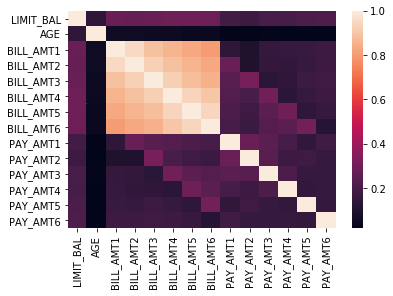

In [12]:
# STANDARDIXED COVARIANCE ESTIMATION (Correlation)
# Note: Categorial variables (nominal or ordinal) would not be effectively captured and should be ignored
# Only finds linear relationships between continuous variables

import seaborn as sns
corrmap = rawData.corr()
sns.heatmap(corrmap, 
            xticklabels=corrmap.columns.values,
            yticklabels=corrmap.columns.values)
corrmap

#NOTE: Bill Aug and bill Sept (.95; Bill AMt 1 and Bill AMt 2); bill Aug and Pay Aug; bill July & bill Aug; .92
# One would expect more similarity between bills or bills and payment; but there is not so correlation does not 
# suggest to me there should be feature reduction; although it seems promising

In [30]:
print(rawData.corr()**2)
# removes direction of relationship


           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.020942   0.081470   0.077459   0.080223   0.086429   
AGE         0.020942  1.000000   0.003163   0.002947   0.002885   0.002637   
BILL_AMT1   0.081470  0.003163   1.000000   0.905321   0.796161   0.740068   
BILL_AMT2   0.077459  0.002947   0.905321   1.000000   0.861790   0.796525   
BILL_AMT3   0.080223  0.002885   0.796161   0.861790   1.000000   0.853720   
BILL_AMT4   0.086429  0.002637   0.740068   0.796525   0.853720   1.000000   
BILL_AMT5   0.087357  0.002435   0.688533   0.739219   0.781296   0.883853   
BILL_AMT6   0.084326  0.002267   0.644247   0.691548   0.728155   0.811695   
PAY_AMT1    0.038117  0.000684   0.019678   0.078605   0.059700   0.054295   
PAY_AMT2    0.031829  0.000475   0.009871   0.010171   0.100448   0.043083   
PAY_AMT3    0.044170  0.000855   0.024614   0.022716   0.016903   0.090014   
PAY_AMT4    0.041307  0.000457   0.025060   0.021726   0.020565 

In [13]:
# Considering Chi-Square (nonparametric -- allows for categorical variables)
from scipy.stats import chi2_contingency
table1 = pd.crosstab(rawData['SEX'], rawData['PAY_0'])
chi2, p, dof, expected = chi2_contingency(table1.values)
print('Chi-Square Sex X Pay 0 %0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['SEX'], rawData['PAY_2'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square Sex X Pay 2 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table3 = pd.crosstab(rawData['SEX'], rawData['PAY_3'])
chi2, p, dof, expected = chi2_contingency(table3.values)
print('Chi-Square Sex X Pay 3 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table4 = pd.crosstab(rawData['SEX'], rawData['PAY_4'])
chi2, p, dof, expected = chi2_contingency(table4.values)
print('Chi-Square Sex X Pay 4 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table5 = pd.crosstab(rawData['SEX'], rawData['PAY_5'])
chi2, p, dof, expected = chi2_contingency(table5.values)
print('Chi-Square Sex X Pay 5 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table6 = pd.crosstab(rawData['SEX'], rawData['PAY_6'])
chi2, p, dof, expected = chi2_contingency(table6.values)
print('Chi-Square Sex X Pay 6 1%0.2f p-value %0.3f' % (chi2, p))

# EDUCATION X PAY ###################

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['EDUCATION'], rawData['PAY_0'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square EDUCATION X Pay 0 %0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['EDUCATION'], rawData['PAY_2'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square EDUCATION X Pay 2 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table3 = pd.crosstab(rawData['EDUCATION'], rawData['PAY_3'])
chi2, p, dof, expected = chi2_contingency(table3.values)
print('Chi-Square EDUCATION X Pay 3 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table4 = pd.crosstab(rawData['EDUCATION'], rawData['PAY_4'])
chi2, p, dof, expected = chi2_contingency(table4.values)
print('Chi-Square EDUCATION X Pay 4 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table5 = pd.crosstab(rawData['EDUCATION'], rawData['PAY_5'])
chi2, p, dof, expected = chi2_contingency(table5.values)
print('Chi-Square EDUCATION X Pay 5 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table6 = pd.crosstab(rawData['EDUCATION'], rawData['PAY_6'])
chi2, p, dof, expected = chi2_contingency(table6.values)
print('Chi-Square EDUCATION X Pay 6 1%0.2f p-value %0.3f' % (chi2, p))

# MARRIAGE X PAY ###################

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['MARRIAGE'], rawData['PAY_0'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square MARRIAGE X Pay 0 %0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['MARRIAGE'], rawData['PAY_2'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square MARRIAGE X Pay 2 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table3 = pd.crosstab(rawData['MARRIAGE'], rawData['PAY_3'])
chi2, p, dof, expected = chi2_contingency(table3.values)
print('Chi-Square MARRIAGE X Pay 3 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table4 = pd.crosstab(rawData['MARRIAGE'], rawData['PAY_4'])
chi2, p, dof, expected = chi2_contingency(table4.values)
print('Chi-Square MARRIAGE X Pay 4 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table5 = pd.crosstab(rawData['MARRIAGE'], rawData['PAY_5'])
chi2, p, dof, expected = chi2_contingency(table5.values)
print('Chi-Square MARRIAGE X Pay 5 1%0.2f p-value %0.3f' % (chi2, p))

from scipy.stats import chi2_contingency
table6 = pd.crosstab(rawData['MARRIAGE'], rawData['PAY_6'])
chi2, p, dof, expected = chi2_contingency(table6.values)
print('Chi-Square MARRIAGE X Pay 6 1%0.2f p-value %0.3f' % (chi2, p))


# EDUCATION X SEX ###################

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['EDUCATION'], rawData['SEX'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square EDUCATION X SEX %0.2f p-value %0.3f' % (chi2, p))


# EDUCATION X MARRIAGE ###################

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['EDUCATION'], rawData['MARRIAGE'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square EDUCATION X MARRIAGE %0.2f p-value %0.3f' % (chi2, p))


# MARRIAGE X SEX ###################

from scipy.stats import chi2_contingency
table2 = pd.crosstab(rawData['MARRIAGE'], rawData['SEX'])
chi2, p, dof, expected = chi2_contingency(table2.values)
print('Chi-Square MARRIAGE X SEX %0.2f p-value %0.3f' % (chi2, p))


# Sex, Pay_0 Chi-Square 139.59 p-value 0.000
# Lots of relationships between the categorical variables

Chi-Square Sex X Pay 0 139.59 p-value 0.000
Chi-Square Sex X Pay 2 1177.72 p-value 0.000
Chi-Square Sex X Pay 3 1160.86 p-value 0.000
Chi-Square Sex X Pay 4 1132.88 p-value 0.000
Chi-Square Sex X Pay 5 1104.64 p-value 0.000
Chi-Square Sex X Pay 6 173.58 p-value 0.000
Chi-Square EDUCATION X Pay 0 1206.88 p-value 0.000
Chi-Square EDUCATION X Pay 2 11401.82 p-value 0.000
Chi-Square EDUCATION X Pay 3 11313.53 p-value 0.000
Chi-Square EDUCATION X Pay 4 11109.26 p-value 0.000
Chi-Square EDUCATION X Pay 5 1926.94 p-value 0.000
Chi-Square EDUCATION X Pay 6 1878.34 p-value 0.000
Chi-Square MARRIAGE X Pay 0 144.72 p-value 0.000
Chi-Square MARRIAGE X Pay 2 1129.53 p-value 0.000
Chi-Square MARRIAGE X Pay 3 1119.89 p-value 0.000
Chi-Square MARRIAGE X Pay 4 1141.36 p-value 0.000
Chi-Square MARRIAGE X Pay 5 1125.01 p-value 0.000
Chi-Square MARRIAGE X Pay 6 1107.75 p-value 0.000
Chi-Square EDUCATION X SEX 23.91 p-value 0.000
Chi-Square EDUCATION X MARRIAGE 1175.71 p-value 0.000
Chi-Square MARRIAGE X S

In [14]:
#FEATURE REDUCTION with PRINCIPLE COMPONENT ANLAYSIS
from sklearn.decomposition import PCA
pca = PCA(n_components = 24)
pca.fit(rawData)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
print(pca.components_)

[[ 4.91590659e-01 -3.52873013e-08 -4.65440885e-07 -1.92469255e-07
   5.56879962e-06  3.42455214e-07  5.68458344e-07  5.81779941e-07
   6.64584131e-07  7.59373260e-07  8.36871693e-07  3.88453549e-01
   3.81356126e-01  3.72179448e-01  3.46397504e-01  3.22920046e-01
   3.08577267e-01  2.65676097e-02  3.12865310e-02  2.68185282e-02
   2.21681253e-02  2.22044122e-02  2.48098976e-02 -1.75479545e-07]
 [ 8.69022684e-01  1.76100266e-07 -1.44571783e-06 -4.01516316e-07
   8.31332276e-06 -3.80340392e-06 -4.62245984e-06 -4.49819779e-06
  -4.25959745e-06 -4.03177492e-06 -3.98438769e-06 -2.21364316e-01
  -2.26375798e-01 -2.16534865e-01 -1.94048190e-01 -1.76775713e-01
  -1.67365250e-01  5.71625946e-03  1.07848222e-02  1.09685628e-02
   1.03644900e-02  1.16931055e-02  1.53341329e-02 -5.06221572e-07]
 [-2.05851404e-02  3.25238862e-07 -2.52509673e-07  7.48257045e-08
  -4.13008761e-06 -4.13991968e-07 -5.80197703e-07  5.15515967e-07
   2.10394474e-06  3.46127254e-06  4.45758941e-06 -5.48940631e-01
  -3.908

In [16]:
print(pca.explained_variance_)

[2.77282244e+10 1.34160226e+10 1.38651759e+09 7.68956999e+08
 4.27909012e+08 4.10708298e+08 3.42696162e+08 2.90020994e+08
 2.65141324e+08 1.34758727e+08 1.08337925e+08 7.71175611e+07
 6.71517114e+07 8.31972071e+01 4.27230303e+00 8.87270585e-01
 5.38896503e-01 4.71937335e-01 3.56174773e-01 2.62448962e-01
 2.43575837e-01 2.11121208e-01 1.75270014e-01 1.48879585e-01]


In [17]:
# Convert to 2 components which account for more than 90% of variance
pca2 = PCA(2)
projected2 = pca.fit_transform(featuresTest)
print(featuresTest.shape)
print(projected2.shape)

plt.scatter(projected[:, 0], projected[:, 1],
           c=rawData.default, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')
plt.colorbar()

NameError: name 'featuresTest' is not defined

Text(0,0.5,'cumulative explained variance')

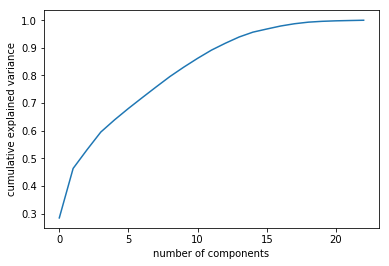

In [18]:
# choose the number of components
# from sklearn.datasets import load_digits
# test = load_rawData()
featuresTest = rawData.iloc[:,0:23] 
featuresTest.shape

featTestScaled = pd.DataFrame(preprocessing.scale(featuresTest), columns = featuresTest.columns)
featTestScaled.describe()


pca = PCA().fit(featTestScaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#around 15 needed for overfitting


In [19]:
# AMOUT OF EXPLAINED VARIANCE and NAMES

pca2 = PCA(.95).fit(featTestScaled)
pca2.n_components_

# 15 components for 95% explained variance
# 19 components for 99%
# 23 components for rule of 5 9s
# Increased variance explained may require excluding more people (given error rate: false positive vs. false negative)
# however directions of maximum variance ay not necessarily contin good features for discrimination

15

In [38]:
pca95 = PCA(n_components=15)
pca95.fit_transform(featTestScaled)

print(pd.DataFrame(pca95.components_, columns=featTestScaled.columns))

    LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0    0.068468 -0.021690   0.016833 -0.005536  0.014156  0.161204  0.194267   
1    0.316251  0.030422  -0.122049 -0.040965  0.063755 -0.297077 -0.333757   
2    0.006479  0.030157  -0.320592  0.480699 -0.492405 -0.014948  0.017940   
3    0.072392 -0.075194   0.242033 -0.412378  0.431735  0.011061  0.047250   
4   -0.109654  0.921892   0.283194 -0.087818 -0.147079 -0.035535 -0.036413   
5   -0.366847 -0.294444   0.497507  0.238986 -0.080201 -0.060580 -0.083052   
6   -0.178160 -0.081321   0.468012  0.190755 -0.091275  0.073801  0.073701   
7    0.026950 -0.000983  -0.079800 -0.033220  0.011251  0.002474 -0.000155   
8    0.071884  0.028050  -0.246516 -0.092307  0.062385 -0.036199 -0.037814   
9   -0.024965  0.024576   0.108780  0.052449  0.004218  0.015110  0.014040   
10  -0.008612 -0.007814   0.010701 -0.009941 -0.021370  0.057351  0.035958   
11  -0.094606  0.053474  -0.193966 -0.149823 -0.048264  0.624059

In [20]:
# if want to run independently
# import pandas as pd
# import pylab as pl
# from sklearn import datasets
# from sklearn.decomposition import PCA
print('Explained variance by component: %s' %pca2.explained_variance_ratio_)
# Explained variance by component: [0.61043701 0.29535381 0.03052419 0.01692859]
# Interesting explained variable by coponent; first seems to be payment ststus and bill amount contributing factors
#second seems to be blaanc limit and negative paymetn status; with some bill amount and payment amount
# third seems to be a demographica combination, education, marraige and age (factors affecting salary), with small component of payment status

# fourth and fifth educaiton is trong as well
#5th education and marriage; which includes some payment amount

# NEXT STEP MAKE CATEGORICAL VARIABLES and TRY AGAIN

Explained variance by component: [0.28446136 0.17909223 0.06738714 0.06432947 0.04438099 0.04118124
 0.03917979 0.03860032 0.03776647 0.03395451 0.03185805 0.02968413
 0.0248437  0.02268702 0.01755459]


In [21]:
# Managing categorical data
# using one-hot encoder to create dummy feature for nominal data (Sex, Education, Marriage; not default as already boolean cat var)

rawData1 = rawData
rawDataSex = pd.get_dummies(rawData[['SEX', 'EDUCATION', 'MARRIAGE']])
# rawDataSex.info()
rawDataSex.isnull().sum()
# rawDataSex


SEX_1          0
SEX_2          0
EDUCATION_0    0
EDUCATION_1    0
EDUCATION_2    0
EDUCATION_3    0
MARRIAGE_0     0
MARRIAGE_1     0
MARRIAGE_2     0
MARRIAGE_3     0
dtype: int64

In [22]:
rawData1.info()
rawDataSex.info()

# test = pd.merge(rawData1, rawDataSex, how = "inner")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [23]:
# JOIN the FRAMES
## Joining the Data Frames took some time and stack overflow
dataCombo = rawData1.join(rawDataSex)
dataCombo.head()
dataCombo.isnull().sum()
# dataCombo.describe(include='all')
dataCombo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 34 columns):
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null category
EDUCATION      30000 non-null category
MARRIAGE       30000 non-null category
AGE            30000 non-null int64
PAY_0          30000 non-null category
PAY_2          30000 non-null category
PAY_3          30000 non-null category
PAY_4          30000 non-null category
PAY_5          30000 non-null category
PAY_6          30000 non-null category
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
default        30000 non-null catego

In [24]:
#Recode Variable
dataCombo["SEX_1"] = dataCombo["SEX_1"].astype('category')
dataCombo["SEX_2"] = dataCombo["SEX_2"].astype('category')

dataCombo["EDUCATION_0"] = dataCombo["EDUCATION_0"].astype('category')
dataCombo["EDUCATION_1"] = dataCombo["EDUCATION_1"].astype('category')
dataCombo["EDUCATION_2"] = dataCombo["EDUCATION_2"].astype('category')
dataCombo["EDUCATION_3"] = dataCombo["EDUCATION_3"].astype('category')

dataCombo["MARRIAGE_0"] = dataCombo["MARRIAGE_0"].astype('category')
dataCombo["MARRIAGE_1"] = dataCombo["MARRIAGE_1"].astype('category')
dataCombo["MARRIAGE_2"] = dataCombo["MARRIAGE_2"].astype('category')
dataCombo["MARRIAGE_3"] = dataCombo["MARRIAGE_3"].astype('category')

dataCombo.info()
# dataCombo.isnull().sum() #Keep checking because I have some issues


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 34 columns):
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null category
EDUCATION      30000 non-null category
MARRIAGE       30000 non-null category
AGE            30000 non-null int64
PAY_0          30000 non-null category
PAY_2          30000 non-null category
PAY_3          30000 non-null category
PAY_4          30000 non-null category
PAY_5          30000 non-null category
PAY_6          30000 non-null category
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
default        30000 non-null catego

In [25]:
# Rename Nominal Variables from One Hot Encoding
dataCombo.rename(columns={'AGE': 'age', 'SEX_1' : 'sexMale', 'SEX_2' : 'sexFemale',
                          'EDUCATION_0' : 'educationOther', 'EDUCATION_1' : 'educationGrad', 
                          'EDUCATION_2' : 'educationUni', 'EDUCATION_3' : 'educationHS',
                          'MARRIAGE_0' : 'maritalStatOther', 'MARRIAGE_1' : 'married', 
                          'MARRIAGE_2' : 'single', 'MARRIAGE_3' : 'divorced',
                          'LIMIT_BAL' : 'limBal',
                          'PAY_0': 'payStatSept', 'PAY_2': 'payStatAug', 'PAY_3': 'payStatJuly',
                          'PAY_4': 'payStatJune', 'PAY_5': 'payStatMay', 'PAY_6' : 'payStatApr',
                          'BILL_AMT1' : 'billSept', 'BILL_AMT2' : 'billAug', 'BILL_AMT3' : 'billJuly', 
                          'BILL_AMT4': 'billJune', 'BILL_AMT5': 'billMay', 'BILL_AMT6': 'billApr',
                          'PAY_AMT1' : 'paySept', 'PAY_AMT2' : 'payAug', 'PAY_AMT3': 'payJuly',
                          'PAY_AMT4' : 'payJune', 'PAY_AMT5' : 'payMay', 'PAY_AMT6': 'payApr'}, inplace=True)
dataCombo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 34 columns):
limBal              30000 non-null int64
SEX                 30000 non-null category
EDUCATION           30000 non-null category
MARRIAGE            30000 non-null category
age                 30000 non-null int64
payStatSept         30000 non-null category
payStatAug          30000 non-null category
payStatJuly         30000 non-null category
payStatJune         30000 non-null category
payStatMay          30000 non-null category
payStatApr          30000 non-null category
billSept            30000 non-null int64
billAug             30000 non-null int64
billJuly            30000 non-null int64
billJune            30000 non-null int64
billMay             30000 non-null int64
billApr             30000 non-null int64
paySept             30000 non-null int64
payAug              30000 non-null int64
payJuly             30000 non-null int64
payJune             30000 non-null int64
pay

In [26]:
print("Now we need to remove duplicate variables from one hot encoding:")

# Remove duplicate variables from one hot encoding
# Create backup

dataComboRev = dataCombo
del dataComboRev['SEX']
del dataComboRev['EDUCATION']
del dataComboRev['MARRIAGE']

dataComboRev.info()

Now we need to remove duplicate variables from one hot encoding:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 31 columns):
limBal              30000 non-null int64
age                 30000 non-null int64
payStatSept         30000 non-null category
payStatAug          30000 non-null category
payStatJuly         30000 non-null category
payStatJune         30000 non-null category
payStatMay          30000 non-null category
payStatApr          30000 non-null category
billSept            30000 non-null int64
billAug             30000 non-null int64
billJuly            30000 non-null int64
billJune            30000 non-null int64
billMay             30000 non-null int64
billApr             30000 non-null int64
paySept             30000 non-null int64
payAug              30000 non-null int64
payJuly             30000 non-null int64
payJune             30000 non-null int64
payMay              30000 non-null int64
payApr              30000 non

In [27]:
# Check for missing variables with is.na
# rawData1.describe(include='all')
dataComboRev.isnull().sum()
# dataComboRev.tail()
dataCombo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 31 columns):
limBal              30000 non-null int64
age                 30000 non-null int64
payStatSept         30000 non-null category
payStatAug          30000 non-null category
payStatJuly         30000 non-null category
payStatJune         30000 non-null category
payStatMay          30000 non-null category
payStatApr          30000 non-null category
billSept            30000 non-null int64
billAug             30000 non-null int64
billJuly            30000 non-null int64
billJune            30000 non-null int64
billMay             30000 non-null int64
billApr             30000 non-null int64
paySept             30000 non-null int64
payAug              30000 non-null int64
payJuly             30000 non-null int64
payJune             30000 non-null int64
payMay              30000 non-null int64
payApr              30000 non-null int64
default             30000 non-null category
sexMale  

In [28]:
## SELECTING DATA
# Can select any given column using location number and name of the dataframe
# variableName = dataframe.iloc[rows, columns]

# 1. SELECT FEATURES

# put DV at end to simplify
#Get list of columns to copy and paste and simplify reordering
cols = list(dataComboRev.columns.values)
cols

yData = dataComboRev[['default']]
yData.info()
yData.describe()

xData = dataComboRev[['limBal',
 'age',
 'payStatSept',
 'payStatAug',
 'payStatJuly',
 'payStatJune',
 'payStatMay',
 'payStatApr',
 'billSept',
 'billAug',
 'billJuly',
 'billJune',
 'billMay',
 'billApr',
 'paySept',
 'payAug',
 'payJuly',
 'payJune',
 'payMay',
 'payApr',
 'sexMale',
 'sexFemale',
 'educationOther',
 'educationGrad',
 'educationUni',
 'educationHS',
 'maritalStatOther',
 'married',
 'single',
 'divorced']]

# xData.info()
# xData.head()
xData.info()
xData.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 1 columns):
default    30000 non-null category
dtypes: category(1)
memory usage: 263.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 30 columns):
limBal              30000 non-null int64
age                 30000 non-null int64
payStatSept         30000 non-null category
payStatAug          30000 non-null category
payStatJuly         30000 non-null category
payStatJune         30000 non-null category
payStatMay          30000 non-null category
payStatApr          30000 non-null category
billSept            30000 non-null int64
billAug             30000 non-null int64
billJuly            30000 non-null int64
billJune            30000 non-null int64
billMay             30000 non-null int64
billApr             30000 non-null int64
paySept             30000 non-null int64
payAug              30000 non-null int64
payJuly             30000 non-n

,limBal,age,billSept,billAug,billJuly,billJune,billMay,billApr,paySept,payAug,payJuly,payJune,payMay,payApr
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [29]:
# FEATURE SELECTION

#FEATURE REDUCTION with PRINCIPAL COMPONENT ANLAYSIS
from sklearn.decomposition import PCA
pca3 = PCA(n_components = 30)
pca3.fit(xData)


PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
print(pca3.components_)



[[ 4.91590659e-01  5.56879962e-06  3.42455214e-07  5.68458344e-07
   5.81779941e-07  6.64584131e-07  7.59373260e-07  8.36871693e-07
   3.88453549e-01  3.81356126e-01  3.72179448e-01  3.46397504e-01
   3.22920046e-01  3.08577267e-01  2.65676097e-02  3.12865310e-02
   2.68185282e-02  2.21681253e-02  2.22044122e-02  2.48098976e-02
   3.52873014e-08 -3.52873014e-08  1.90903153e-08  2.57627978e-07
  -1.07086018e-07 -1.69632276e-07 -4.65104491e-09  1.80208644e-07
  -1.53994898e-07 -2.15627009e-08]
 [ 8.69022684e-01  8.31332276e-06 -3.80340392e-06 -4.62245984e-06
  -4.49819779e-06 -4.25959745e-06 -4.03177492e-06 -3.98438769e-06
  -2.21364316e-01 -2.26375798e-01 -2.16534865e-01 -1.94048190e-01
  -1.76775713e-01 -1.67365250e-01  5.71625946e-03  1.07848222e-02
   1.09685628e-02  1.03644900e-02  1.16931055e-02  1.53341329e-02
  -1.76100266e-07  1.76100266e-07 -3.87214111e-09  1.07615401e-06
  -6.94973759e-07 -3.77308108e-07  1.07605933e-10  3.62661127e-07
  -3.24128756e-07 -3.86399770e-08]
 [-2.0

In [31]:
print(pca3.explained_variance_)

[2.77282244e+10 1.34160226e+10 1.38651759e+09 7.68956999e+08
 4.27909012e+08 4.10708298e+08 3.42696162e+08 2.90020994e+08
 2.65141324e+08 1.34758727e+08 1.08337925e+08 7.71175611e+07
 6.71517114e+07 8.32442463e+01 4.26198245e+00 8.82622451e-01
 5.36720495e-01 4.95824518e-01 4.11644877e-01 3.55940643e-01
 3.30662095e-01 2.62213358e-01 1.82229255e-01 1.75153011e-01
 2.02618193e-02 1.60455487e-02 2.33418933e-03 2.15342450e-22
 2.15342450e-22 2.15342450e-22]


In [32]:
xData.shape



(30000, 30)

Text(0.5,1,'unscaled features(xData) scree plot')

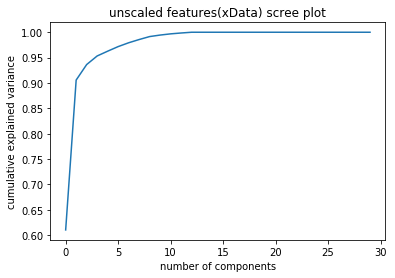

In [33]:
#Check feature importance
#variable importance

pca3 = PCA().fit(xData)
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('unscaled features(xData) scree plot')


Number of components at 99% =  22


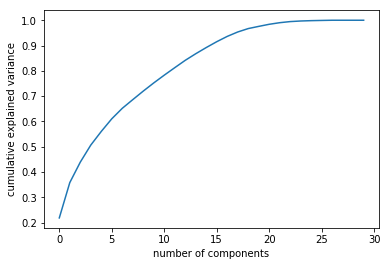

In [34]:
#scale
featuresTest = xData
featuresTest.shape

featTestScaled = pd.DataFrame(preprocessing.scale(xData), columns = xData.columns)
pca4 = PCA().fit(featTestScaled)
plt.plot(np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

pca4 =PCA(.99).fit(featTestScaled)
print("Number of components at 99% = ", pca4.n_components_)
# Kept 22 of the components
# Does scale the categorical variables but not horribly problematic

In [35]:
pca99scaled = PCA(n_components=22)
pca99scaled.fit_transform(featTestScaled)

pd.set_option('display.max_columns', None)
# print(pd.DataFrame(pca99scaled.components_, columns=featTestScaled.columns))
components = pd.DataFrame(pca99scaled.components_, columns=featTestScaled.columns)
print(components)

      limBal       age  payStatSept  payStatAug  payStatJuly  payStatJune  \
0   0.065639  0.014666     0.162947    0.196272     0.202279     0.209002   
1   0.318532  0.069106    -0.290394   -0.326520    -0.334711    -0.334626   
2  -0.012328 -0.423061    -0.014884   -0.010933    -0.002946    -0.000088   
3   0.028498  0.135475     0.001705    0.004141     0.001679    -0.002756   
4   0.080139  0.129508     0.055065    0.067053     0.096656     0.118758   
5   0.034921 -0.038219    -0.015643    0.031544     0.080566     0.112996   
6  -0.210456  0.056250    -0.042133   -0.047637    -0.055484    -0.069670   
7  -0.032075  0.029831     0.017260    0.004745     0.005817     0.014509   
8   0.002800  0.105627    -0.001509   -0.014505    -0.011083    -0.010587   
9   0.066368 -0.013237     0.003455    0.005457     0.017989     0.020147   
10 -0.115720 -0.038838    -0.094243   -0.110730    -0.051862    -0.003584   
11 -0.017476 -0.016776     0.014106    0.010283    -0.022859    -0.046291   

In [36]:
explainedVar = pca99scaled.explained_variance_
print(explainedVar)

[6.55564417 4.18707709 2.42684878 2.02476148 1.61768174 1.49885189
 1.24318674 1.02935945 1.01325689 0.96976066 0.92027461 0.88700891
 0.87253964 0.78301886 0.73223842 0.69383488 0.62867968 0.52455539
 0.4037724  0.25986677 0.24894449 0.18867453]


In [37]:
pca5 = PCA(n_components = 22)
pca5.fit(xData)
newData = pca5.transform(xData)
print("original shape:     ", xData.shape)
print("transformed.shape:     ", newData.shape)

print(newData)

original shape:      (30000, 30)
transformed.shape:      (30000, 22)
[[-1.66488191e+05 -7.55381537e+04 -4.72952106e+02 ... -4.76520736e-01
  -3.78711427e-01  1.00703439e+00]
 [-1.14226977e+05  9.78067125e+03  2.73444748e+03 ... -2.46560452e+00
   6.68137198e-01  2.60360901e-01]
 [-9.84323622e+04 -3.34713873e+04 -2.67846979e+03 ... -4.25637758e-02
   8.79683364e-01 -1.59735185e-02]
 ...
 [-1.40206128e+05 -7.78574965e+04  2.62431334e+04 ... -8.98722759e-01
   7.84235863e-01 -7.80642030e-01]
 [-4.14277408e+04 -7.49083037e+04  1.77225880e+04 ...  9.64217779e-01
  -7.41569602e-01  2.23045356e-02]
 [-7.08603112e+04 -9.55141443e+04 -1.41174666e+04 ... -6.07424483e-02
   2.43257038e-02 -3.44052164e-02]]


Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


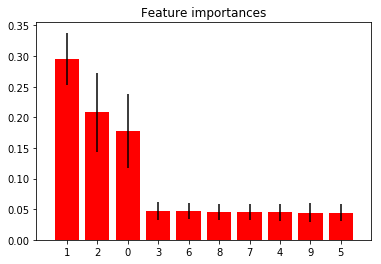

In [38]:
#1. Select Feature Space
X = xData
y = yData
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Text(0.5,0,'Relative Importance')

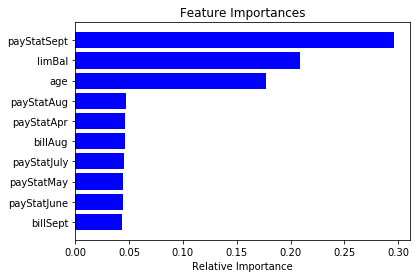

In [39]:
features=xData.columns[[1,2,0,3,6,8,7,4,9,5]]
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [40]:
Xrev = xData.filter(['payStatSept','limBal','age', 
                     'payStatAug','payStatApr', 'billAug', 
                     'payStatJuly','payStatMay','payStatJune','billSept'], axis=1)
Xrev.shape
print(Xrev)

      payStatSept  limBal  age payStatAug payStatApr  billAug payStatJuly  \
ID                                                                          
1               2   20000   24          2         -2     3102          -1   
2              -1  120000   26          2          2     1725           0   
3               0   90000   34          0          0    14027           0   
4               0   50000   37          0          0    48233           0   
5              -1   50000   57          0          0     5670          -1   
6               0   50000   37          0          0    57069           0   
7               0  500000   29          0          0   412023           0   
8               0  100000   23         -1         -1      380          -1   
9               0  140000   28          0          0    14096           2   
10             -2   20000   35         -2         -1        0          -2   
11              0  200000   34          0         -1     9787           2   

In [41]:
#1. Select Feature Space CONTINUED


features = Xrev
print('Summary of feature sample')
features.head() 
# features.tail() # Extra checks
# features.info()



Summary of feature sample


,payStatSept,limBal,age,payStatAug,payStatApr,billAug,payStatJuly,payStatMay,payStatJune,billSept
ID,,,,,,,,,,
1,2,20000,24,2,-2,3102,-1,-2,-1,3913
2,-1,120000,26,2,2,1725,0,0,0,2682
3,0,90000,34,0,0,14027,0,0,0,29239
4,0,50000,37,0,0,48233,0,0,0,46990
5,-1,50000,57,0,0,5670,-1,0,0,8617


In [42]:
# 2. Select the DV

depVar = yData
depVar.head()


,default
ID,
1,1
2,1
3,0
4,0
5,0


In [43]:
# 3. Establish the training set (Feature Space : X Training and for the Depenedent variable
# Allows for randomization
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, depVar, 
                                                test_size=0.1, random_state=1)
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

print("X TRAIN:", X_train.head())
print("X TEST: ", X_test.head())
print(y_train.head())


270000
30000
27000
3000
X TRAIN:       payStatSept  limBal  age payStatAug payStatApr  billAug payStatJuly  \
ID                                                                          
13100           0   80000   26          0          0    79849           0   
4705            0   30000   46          0          2    13119           0   
21134          -2  220000   48         -2          0        0          -1   
14612           0  150000   28          0          0    96903           0   
3273            0   50000   23          0          2    51175           0   

      payStatMay payStatJune  billSept  
ID                                      
13100          0           0     80233  
4705           0           0     12485  
21134          0           0         0  
14612          0           0     95322  
3273           0           0     48725  
X TEST:        payStatSept  limBal  age payStatAug payStatApr  billAug payStatJuly  \
ID                                                    

In [44]:
# OLD MODEL of TEST/TRAIN SPLIT \ Non random model

# #Create the training set
# import random
# X_train = (features[:-1000])
# X_train.head()


In [45]:
#Dependent Variable Training Set (y Training) | non random model
# y_train = depVar[:-1000]
# y_train_count = len(y_train.index)
# print('The number of observations in the Y training set are:',str(y_train_count))
# y_train.head()

In [46]:
#Testing Set (X Testing) | non random model
# X_test = features[-1000:]
# X_test_count = len(X_test.index)
# print('The number of observations in the feature testing set is:',str(X_test_count))
# print(X_test.head())

In [47]:
# SCI-KIT Learn Format
# need to specify wher ethe object lives before imporing

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [48]:
# TUNING PARAMETERS & MODEL DEFINITION

# standard format
# model = DecisionTreeClassifier(parameters go here)


## BUILDING THE MODELS AND CHOOSING THE RIGHT MODEL
# 1. Confirm all modules/libraries are imported

# 2. Establish the variables you will use for defining each model
# Models
modelDT = DecisionTreeClassifier()
modelknn = KNeighborsClassifier()
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelAda = AdaBoostClassifier()
modelNN = MLPClassifier()


In [49]:
# 5. PASS TRAINING DATA TO MODELS
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
modelknn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
modelSVC.fit(X_train, y_train.values.ravel())
#needed different dataset so move foward
#Original ERROR: :\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
#   y = column_or_1d(y, warn=True)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
modelRF.fit(X_train, y_train.values.ravel())
#ERROR MESSAGE: Take out this and earlier data, another data conversion warning

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
modelAda.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [67]:
modelNN.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [61]:
## CHOOSE THE RIGHT MODEL ("Score each model")_score

# verify the necessary models are there for scoring
from sklearn.model_selection import cross_val_score

In [62]:
# pass each trained model and training sets to the function

print("The training scores for the Decision Tree Model on the Training set are:")
print(cross_val_score(modelDT, X_train, y_train))
modelDT.score(X_train, y_train)

The training scores for the Decision Tree Model on the Training set are:
[0.73069659 0.72366667 0.73163685]


0.9962592592592593

In [63]:
print("The training scores for the KNN Model on the Training set are:")
print(cross_val_score(modelknn, X_train, y_train.values.ravel()))
modelknn.score(X_train, y_train.values.ravel())

The training scores for the KNN Model on the Training set are:
[0.74091768 0.74044444 0.7460829 ]


0.8123333333333334

In [57]:
print("The training scores for the SVC model on the Training set are:")
print(cross_val_score(modelSVC, X_train, y_train.values.ravel()))
modelSVC.score(X_train, y_train.values.ravel())

The training scores for the SVC model on the Training set are:
[0.78113543 0.77866667 0.78042005]


0.9897037037037038

In [64]:
print("The training scores for the Random Forest model on the Training set are:")
print(cross_val_score(modelRF, X_train, y_train.values.ravel()))
modelRF.score(X_train, y_train.values.ravel())

The training scores for the Random Forest model on the Training set are:
[0.79846684 0.79611111 0.80331148]


0.9766666666666667

In [65]:
print("The training scores for the Ada Boosted Trees model on the Training set are:")
print(cross_val_score(modelAda, X_train, y_train.values.ravel()))
modelAda.score(X_train, y_train.values.ravel())

The training scores for the Ada Boosted Trees model on the Training set are:
[0.81557605 0.81244444 0.82031337]


0.816037037037037

In [68]:
print("The training scores for the Neural Network model on the Training set are:")
print(cross_val_score(modelNN, X_train, y_train.values.ravel()))
modelNN.score(X_train, y_train.values.ravel())

The training scores for the Neural Network model on the Training set are:
[0.77046995 0.77766667 0.78119791]


0.5017777777777778

In [ ]:
#INTERPRETING VALUES
# [Value 1  Value 2   Value 3]
# Value 1: Score array for test scores on each cross validation (Cv split)
# Higher is an indicator of a better performing model
# QUESTION: Is it based on magnitude? It seems to be the case based on the scores

# Value 2: The time for fitting the estimator on the trainign set for each CV split 
# QUESTION: How is time measured? Seconds? Cycles?

# Value 3: The time for scoring the estimator on the test set for each cv split

# IN ADDITION
# Check the R2 or relevant score as different algorithms have different scores
# check the Estimator referene to see what scoring methods work best
# default metric is R-squared

In [69]:
## TUNE at least 3 MODELS ON AT LEAST TWO PARAMETERS

In [135]:
modelDTrev = DecisionTreeClassifier(max_depth=6, splitter='random') # tried max depth from 2 < 10, started with 5; 3 is optimal
# without the random splitter; otherwise 6 gives the best score

modelknnrev = KNeighborsClassifier(n_neighbors=8, weights='distance') # 5 + neighbours worse than 2 without distance; weight at distance
# the score increase substantially and the model fit better (and almost as good as some of the others)

modelSVCrev = SVC(max_iter = 4000, kernel = 'poly') #tried max_iter; solver terminated early repeated warnings
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
#   % self.max_iter, ConvergenceWarning)#  adding 'poly' made it too long

modelRFrev = RandomForestClassifier(n_estimators = 20, max_depth = 40) # 20 estimators could slightly increase model value; and slightly increase score
#model worked better with no maximum depth or high humber like 40 (tried various numbers at intervals from 5  - 50)

modelAdarev = AdaBoostClassifier(n_estimators=10, learning_rate=1) #whether 10 or 80 estimators the accuracy and model fit stay about the same; so 
# I went with lower because it takes less time; #if learning rate gets higher (even only 2 or 3) the model fit goes down, way down

modelNNrev = MLPClassifier(max_iter = 200, hidden_layer_sizes=(100,)) #adjusted max iterations; default or lower did the best, even though I ranged from 50 to 500
# defaults for hidden layer sizes worked best as well here, ranging from 50 to 300 really made the model fit much worse
# so I returned it to the default


In [147]:
modelDTrev.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [148]:
print("The training scores for the *tuned* Decision Tree Model on the Training set are:")
print(cross_val_score(modelDTrev, X_train, y_train))
modelDTrev.score(X_train, y_train)

#went up with max depth reduced (model fit, but prediction value when down)

The training scores for the *tuned* Decision Tree Model on the Training set are:
[0.81724253 0.81788889 0.82631403]


0.817037037037037

In [150]:
modelknnrev.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')

In [151]:
print("The training scores for the *tuned* KNN Model on the Training set are:")
print(cross_val_score(modelknnrev, X_train, y_train.values.ravel()))
modelknnrev.score(X_train, y_train.values.ravel())

The training scores for the *tuned* KNN Model on the Training set are:
[0.74391734 0.737      0.74874986]


0.9962592592592593

In [152]:
modelRFrev.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
print("The training scores for the *tuned* RF Model on the Training set are:")
print(cross_val_score(modelRFrev, X_train, y_train.values.ravel()))
modelRFrev.score(X_train, y_train.values.ravel())

The training scores for the *tuned* RF Model on the Training set are:
[0.8014665  0.79911111 0.80886765]


0.9889629629629629

In [154]:
modelSVCrev.fit(X_train, y_train.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=4000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [155]:
print("The training scores for the *tuned* SVC Model on the Training set are:")
print(cross_val_score(modelSVCrev, X_train, y_train.values.ravel()))
modelSVCrev.score(X_train, y_train.values.ravel())
#Not going back and rerunning these because the SVC kept hanging my machine.

The training scores for the *tuned* SVC Model on the Training set are:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[0.23230752 0.295      0.26880765]


0.27414814814814814

In [156]:
modelAdarev.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=10, random_state=None)

In [157]:
print("The training scores for the *tuned* ADA Boosted Model on the Training set are:")
print(cross_val_score(modelAdarev, X_train, y_train.values.ravel()))
modelAdarev.score(X_train, y_train.values.ravel())

The training scores for the *tuned* ADA Boosted Model on the Training set are:
[0.81602044 0.815      0.82164685]


0.8174814814814815

In [158]:
modelNNrev.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [159]:
print("The training scores for the *tuned* ADA Boosted Model on the Training set are:")
print(cross_val_score(modelNNrev, X_train, y_train.values.ravel()))
modelNNrev.score(X_train, y_train.values.ravel())

The training scores for the *tuned* ADA Boosted Model on the Training set are:
[0.77946895 0.58677778 0.77841982]


0.7807407407407407

In [166]:
## MAKE PREDICTIONS & EVALUATE THE RESULTS
predictionsDT = modelDTrev.predict(X_test)
predictionsKnn = modelknnrev.predict(X_test)
predictionsSVC = modelSVCrev.predict(X_test)
predictionsRF = modelRFrev.predict(X_test)
predictionsAda = modelAdarev.predict(X_test)
predictionsNN = modelNNrev.predict(X_test)


# Evaluate the results
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## NOTE: Because it is a regression problem, use RMSE & R Squred to measure the trained model
## Remember: RMSE is square root of MSE so youwill also need to ensure we've also included sqrt function

from math import sqrt

# 2. Calcuate RMSE with own function
rmseDT = sqrt(mean_squared_error(y_test, predictionsDT))
print('RMSE DT Tuned: ', rmseDF)

rmseKnn = sqrt(mean_squared_error(y_test, predictionsKnn))
print('RMSE KNN Tuned: ', rmseKnn)

rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print('RMSE SVC Tuned: ', rmseSVC)

rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print('RMSE RF Tuned: ', rmseRF)

rmseAda = sqrt(mean_squared_error(y_test, predictionsAda))
print('RMSE Ada Boosted Tuned: ', rmseKnn)

rmseNN = sqrt(mean_squared_error(y_test, predictionsNN))
print('RMSE Neural Networks Tuned: ', rmseNN)

RMSE DT Tuned:  0.42739521132865615
RMSE KNN Tuned:  0.5059644256269407
RMSE SVC Tuned:  0.8449852069711044
RMSE RF Tuned:  0.44083254568297625
RMSE Ada Boosted Tuned:  0.5059644256269407
RMSE Neural Networks Tuned:  0.4732863826479693


In [168]:
# 3. Establish a variable and use the included function; ground truth 
# and precitions to calculate R-squared

predRsquaredDT = r2_score(y_test, predictionsDT)
predRsquaredKnn = r2_score(y_test, predictionsKnn)
predRsquaredSVC = r2_score(y_test, predictionsSVC)
predRsquaredRF = r2_score(y_test, predictionsRF)
predRsquaredAda = r2_score(y_test, predictionsAda)
predRsquaredNN = r2_score(y_test, predictionsNN)

In [173]:
# 4. Print Predictions

predictionsDTrev = modelDTrev.predict(X_test)
predRsquaredDT = r2_score(y_test, predictionsDT)
rmseDT = sqrt(mean_squared_error(y_test, predictionsDT))
print('R Squared for DT:  %.3f' % predRsquaredDT)
print('RMSE for DT model: %.3f' % rmseDT)

predictionsKnnrev = modelknnrev.predict(X_test)
predRsquaredKnn = r2_score(y_test, predictionsKnn)
rmseKnn = sqrt(mean_squared_error(y_test, predictionsKnn))
print('R Squared for KNN:  %.3f' % predRsquaredKnn)
print('RMSE for Knn model: %.3f' % rmseKnn)

predictionsSVCrev = modelSVCrev.predict(X_test)
predRsquaredSVC = r2_score(y_test, predictionsSVC)
rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print('R Squared for SVC:  %.3f' % predRsquaredSVC)
print('RMSE for SVC model: %.3f' % rmseSVC)

predictionsRFrev = modelRFrev.predict(X_test)
predRsquaredRF = r2_score(y_test, predictionsRF)
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared for RF:  %.3f' % predRsquaredRF)
print('RMSE for RF model: %.3f' % rmseRF)

predictionsAdarev = modelAdarev.predict(X_test)
predRsquaredAda = r2_score(y_test, predictionsAda)
rmseAda = sqrt(mean_squared_error(y_test, predictionsAda))
print('R Squared for Ada:  %.3f' % predRsquaredAda)
print('RMSE for Ada model: %.3f' % rmseAda)

predictionsNNrev = modelNNrev.predict(X_test)
predRsquaredNN = r2_score(y_test, predictionsNN)
rmseNN = sqrt(mean_squared_error(y_test, predictionsNN))
print('R Squared for NN:  %.3f' % predRsquaredNN)
print('RMSE for NN model: %.3f' % rmseNN)

R Squared for DT:  -0.549
RMSE for DT model: 0.520
R Squared for DT original:  -0.549
RMSE for DT model: 0.520
R Squared for KNN:  -0.467
RMSE for Knn model: 0.506
R Squared for SVC:  -3.090
RMSE for SVC model: 0.845
R Squared for RF:  -0.113
RMSE for RF model: 0.441
R Squared for Ada:  -0.073
RMSE for Ada model: 0.433
R Squared for NN:  -0.283
RMSE for NN model: 0.473


In [190]:
# RUN ANALYSIS ON FULL DATA SET BUT SCALED
from sklearn import preprocessing
import numpy as np
X_scale = preprocessing.scale(xData)
X_scale

array([[-1.13672015, -1.24601985,  1.79456386, ...,  1.09377971,
        -1.06647132, -0.10432569],
       [-0.3659805 , -1.02904717, -0.87499115, ..., -0.91426088,
         0.93767172, -0.10432569],
       [-0.59720239, -0.16115646,  0.01486052, ..., -0.91426088,
         0.93767172, -0.10432569],
       ...,
       [-1.05964618,  0.16430256,  3.57426721, ..., -0.91426088,
         0.93767172, -0.10432569],
       [-0.67427636,  0.59824792,  0.90471219, ...,  1.09377971,
        -1.06647132, -0.10432569],
       [-0.90549825,  1.14067961,  0.01486052, ...,  1.09377971,
        -1.06647132, -0.10432569]])

In [194]:
# RUN ANALYSIS ON THE FULL DATA SET
# Using best model

from sklearn.cross_validation import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale, depVar, 
                                                test_size=0.1, random_state=1)
print(X_train2.size)
print(X_test2.size)
print(y_train2.size)
print(y_test2.size)


print("X TRAIN FULL:", X_train2)
print("X TEST FULL: ", X_test2)
print(y_train2)


810000
90000
27000
3000
X TRAIN FULL: [[-0.67427636 -1.02904717  0.01486052 ... -0.91426088  0.93767172
  -0.10432569]
 [-1.05964618  1.14067961  0.01486052 ... -0.91426088  0.93767172
  -0.10432569]
 [ 0.40475915  1.35765229 -1.76484282 ...  1.09377971 -1.06647132
  -0.10432569]
 ...
 [-0.90549825 -1.46299253  0.01486052 ... -0.91426088  0.93767172
  -0.10432569]
 [-0.67427636 -0.05267012 -0.87499115 ... -0.91426088  0.93767172
  -0.10432569]
 [ 1.02135086  0.16430256 -1.76484282 ...  1.09377971 -1.06647132
  -0.10432569]]
X TEST FULL:  [[ 1.09842483 -0.37812914  0.01486052 ...  1.09377971 -1.06647132
  -0.10432569]
 [-1.21379411  1.46613863 -0.87499115 ...  1.09377971 -1.06647132
  -0.10432569]
 [-0.90549825 -0.81207449 -0.87499115 ...  1.09377971 -1.06647132
  -0.10432569]
 ...
 [-0.13475861 -0.48661547  1.79456386 ...  1.09377971 -1.06647132
  -0.10432569]
 [ 1.40672068  0.8152206  -1.76484282 ...  1.09377971 -1.06647132
  -0.10432569]
 [ 0.32768518  0.16430256  0.01486052 ...  1.0

In [195]:
modelRFfull = RandomForestClassifier()

In [196]:
modelRFfull.fit(X_train2, y_train2.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
print("The training scores for the RF Model on the Full Training set are:")
print(cross_val_score(modelRFfull, X_train2, y_train2.values.ravel()))
modelRFfull.score(X_train2, y_train2.values.ravel())

The training scores for the RF Model on the Full Training set are:
[0.80357738 0.79922222 0.80664518]


0.9793703703703703

In [198]:
predictionsRFfull = modelRFfull.predict(X_test2)

predictionsRFfull = modelRFfull.predict(X_test2)
predRsquaredRFfull = r2_score(y_test2, predictionsRFfull)
rmseRFfull = sqrt(mean_squared_error(y_test2, predictionsRFfull))
print('R Squared for RF (full Data):  %.3f' % predRsquaredRFfull)
print('RMSE for RF model (Full data): %.3f' % rmseRFfull)

predRsquaredRFfull = r2_score(y_test2, predictionsRFfull)

R Squared for RF (full Data):  -0.090
RMSE for RF model (Full data): 0.436


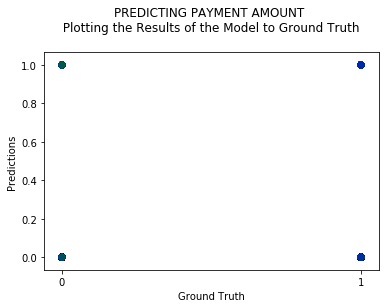

In [204]:
## CONCLUSIONS
# Predictions not better than the truth
# Options, Recommendations listed in the report.